In [1]:
import transforms3d.quaternions as tf
import sympy
sympy.init_printing()

In [2]:
a = sympy.symbols('a_1:3')
b = sympy.symbols('b_1:3')
c = sympy.symbols('c_1:3')
d = sympy.symbols('d_1:3')

q0 = sympy.Matrix([a[0], b[0], c[0], d[0]])
q1 = sympy.Matrix([a[1], b[1], c[1], d[1]])

In [3]:
def qmult(q0, q1):
    res = sympy.Matrix(tf.qmult(q0, q1))
    res.simplify()
    return res

def qconj(q):
    return sympy.Matrix([q[0], -q[1], -q[2], -q[3]])

def qnorm(q):
    return sympy.sqrt(qmult(q, qconj(q))[0])

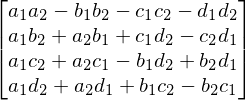

In [4]:
qmult(q0, q1)

In [5]:
qconj(q1).T

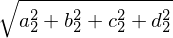

In [6]:
qnorm(q1)

In [7]:
qmult(q0, qconj(q0)/qnorm(q0)**2)

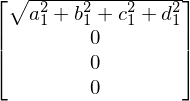

In [8]:
qmult(q0, qconj(q0)/qnorm(q0))

In [9]:
def qinv(q):
    res = qconj(q)/qnorm(q)**2
    res.simplify()
    return res

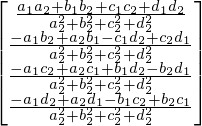

In [10]:
qmult(q0, qinv(q1))